In [25]:
import torch
from torch import nn
from torch.optim import Adam
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

In [26]:
# get dataset
train = datasets.MNIST(root= '../datasets', download = True, train = True, transform = ToTensor())
train_loader = DataLoader(train, batch_size = 32)
train.data.shape

torch.Size([60000, 28, 28])

In [27]:
# create model class
class ImageClassifier(nn.Module):
    def __init__(self):
        super().__init__()

        self.model = nn.Sequential(
            # CNN
            nn.Conv2d(1, 32, (3,3)),
            nn.ReLU(),
            nn.Conv2d(32, 64, (3,3)),
            nn.ReLU(),
            nn.Conv2d(64, 64, (3,3)),
            nn.ReLU(),

            # Dense
            nn.Flatten(),
            nn.Linear(64 * (28-6) * (28-6), 10)
        )

    def forward(self, x):
        return self.model(x)

In [28]:
# create instance for nn
model = ImageClassifier().to('cuda')

opt = Adam(model.parameters(), lr = 1e-3)
loss_fn = nn.CrossEntropyLoss()

In [29]:
# training loop
EPOCHS = 5
for epoch in range(EPOCHS):

    for data in train_loader:
        x, y = data

        # send to gpu
        x, y = x.to('cuda'), y.to('cuda')

        # make prediction
        y_pred = model(x)

        # calc loss
        loss = loss_fn(y_pred, y)

        # backprop
        opt.zero_grad()
        loss.backward()
        opt.step()

    
    print(f'Epoch: {epoch} | loss: {loss.item()}')

Epoch: 0 | loss: 0.010230892337858677
Epoch: 1 | loss: 0.005136302672326565
Epoch: 2 | loss: 0.0011571476934477687
Epoch: 3 | loss: 0.0004669378977268934
Epoch: 4 | loss: 0.0012390125775709748


In [30]:
# save model
from torch import save, load

with open('model_state.pt', 'wb') as f:
    save(model.state_dict(), f)

In [31]:
# evaluation of model
# get dataset
test = datasets.MNIST(root= '../datasets', download = True, train = False, transform = ToTensor())
test_loader = DataLoader(train, batch_size = 32)
train.data.shape

torch.Size([60000, 28, 28])

In [36]:
true_ans = 0
false_ans = 0
for data in train_loader:
    x, y = data
    # send to gpu
    x, y = x.to('cuda'), y.to('cuda')

    # make prediction
    y_pred = model(x)

    for pred, ans in zip(y_pred, y):
        if torch.argmax(pred) == ans:
            true_ans += 1
        else:
            false_ans += 1

print(f'Accuracy is: {true_ans/(true_ans + false_ans)}')
        


Accuracy is: 0.9965


In [37]:
#
# Trying own input
#

In [73]:
import torchvision
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

5

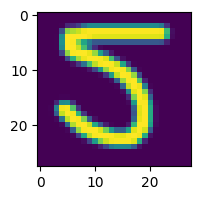

In [79]:
# feeding own data
def predict_number(path):
    transform = transforms.Compose([
        transforms.Resize((28, 28)),   # Resize to 28x28 pixels
        transforms.Grayscale(),        # Convert to grayscale
        transforms.ToTensor()           # Convert PIL image to PyTorch tensor
    ])

    # Load the image and apply the transformation
    image = Image.open(path)
    image = transform(image).to('cuda')

    # show image
    plt.figure(figsize=(15, 2))
    plt.imshow(torch.reshape(image, (28, 28)).cpu().numpy())

    # prepare data
    image = torch.reshape(image, (1, 1, 28, 28))

    # make pred
    pred = model(image)
    return torch.argmax(pred).item()
    

predict_number('./img.png')